In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("analyses.pkl", "rb") as f:
    l = pickle.load(f)

with open("analyses.pkl.bak", "rb") as f:
    b = pickle.load(f)

l.extend(b)

In [3]:
df_sha = pd.DataFrame([x.sha256 for x in l])
l = [x.last_analysis_stats for x in l]

In [4]:
df = pd.DataFrame(l)
df = pd.concat([df_sha, df], axis=1)

In [5]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'confirmed-timeout'
    df = df.drop(columns=['confirmed-timeout'])
    # Drop column: 'suspicious'
    df = df.drop(columns=['suspicious'])
    # Drop column: 'type-unsupported'
    df = df.drop(columns=['type-unsupported'])
    # Drop column: 'timeout'
    df = df.drop(columns=['timeout'])
    # Drop column: 'harmless'
    df = df.drop(columns=['harmless'])
    df.rename({0: "sha256"}, inplace=True, axis=1)
    df = df.drop(columns=["failure", "undetected"])
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,sha256,malicious
0,2d98ef456baaf79733835aa21c87b128f9a9335e252001...,33
1,be343ef8cacc9c9c8e45e3562681c689d7f6f1181613a1...,43
2,c2bd29ad1a97df37aca935b8c596f2d8c0c1295550b72d...,46
3,fc7032b6690b4ab4fba8d5ab1f0fc2e8bdf9461566b7ea...,48
4,943a40f294dd61a598c018ba1f6a4ae458e8cd925f4d01...,41


In [6]:
data = pd.read_csv("lk_dataset/data/df.csv")

data.drop(columns=["added_features"], inplace=True)
df = pd.merge(data, df_clean, left_on="malware", right_on="sha256", how="inner").drop(columns=["sha256"]).rename({"malicious": "N_orig"}, axis=1)
df = pd.merge(df, df_clean, left_on="obfuscated", right_on="sha256", how="left").drop(columns=["sha256"]).rename({"malicious": "N_adv"}, axis=1)
df

,malware,obfuscated,bb_orig,bb_adv,undetected_obfuscated,N_orig,N_adv
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,2d98ef456baaf79733835aa21c87b128f9a9335e252001...,0.0,0.0,39,63,33
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,be343ef8cacc9c9c8e45e3562681c689d7f6f1181613a1...,1.0,0.0,29,61,43
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,c2bd29ad1a97df37aca935b8c596f2d8c0c1295550b72d...,0.0,0.0,27,59,46
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,fc7032b6690b4ab4fba8d5ab1f0fc2e8bdf9461566b7ea...,0.0,0.0,21,62,48
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,943a40f294dd61a598c018ba1f6a4ae458e8cd925f4d01...,1.0,0.0,32,58,41
...,...,...,...,...,...,...,...
95,b552f7464a49cb46efa58cc187c24840323260ef3af505...,31204e495913f45644b60aba49a5b58cd089cce7153bd6...,0.0,0.0,27,52,45
96,210f2d1def90a522af155a968e10aca143b5a79c692dfb...,757e574a02f5f6fe2f3966823f980782ca2e05602f06f1...,0.0,0.0,40,26,33
97,3c8c8bf3b71a6eebf52f484da1569b2000fd1c6e621434...,8511a683652c914d2214e9e98130cd9c2828880cf3bd72...,0.0,0.0,28,66,44
98,3b7828a7ed4b80fcc7276f6554a1a9500f7e0a1b87e986...,d99fa08486f447a2f15cbadc3f4d00e296a101ab16d7b6...,0.0,0.0,22,65,51


In [7]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    df["evasive_rate"] = (df["N_orig"] - df["N_adv"]) / df["N_orig"]
    df["evasive_rate"] = df["evasive_rate"].clip(lower=0)
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,malware,obfuscated,bb_orig,bb_adv,undetected_obfuscated,N_orig,N_adv,evasive_rate
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,2d98ef456baaf79733835aa21c87b128f9a9335e252001...,0.0,0.0,39,63,33,0.476190
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,be343ef8cacc9c9c8e45e3562681c689d7f6f1181613a1...,1.0,0.0,29,61,43,0.295082
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,c2bd29ad1a97df37aca935b8c596f2d8c0c1295550b72d...,0.0,0.0,27,59,46,0.220339
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,fc7032b6690b4ab4fba8d5ab1f0fc2e8bdf9461566b7ea...,0.0,0.0,21,62,48,0.225806
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,943a40f294dd61a598c018ba1f6a4ae458e8cd925f4d01...,1.0,0.0,32,58,41,0.293103


In [8]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_clean):
    # Drop duplicate rows in columns: 'malware', 'obfuscated'
    df_clean = df_clean.drop_duplicates(subset=['malware', 'obfuscated'])
    return df_clean

df_clean_1 = clean_data(df_clean.copy())
df_clean_1.head()

,malware,obfuscated,bb_orig,bb_adv,undetected_obfuscated,N_orig,N_adv,evasive_rate
0,32c2ec6c80d79477f15d499019153cfd97d3e2d7330144...,2d98ef456baaf79733835aa21c87b128f9a9335e252001...,0.0,0.0,39,63,33,0.476190
1,81c26eb117627fe295d480b01f709347f92ce1b515b994...,be343ef8cacc9c9c8e45e3562681c689d7f6f1181613a1...,1.0,0.0,29,61,43,0.295082
2,77003607b1ac14cb1b71acf72218c3d265c82bd926de97...,c2bd29ad1a97df37aca935b8c596f2d8c0c1295550b72d...,0.0,0.0,27,59,46,0.220339
3,7a9a6d01655b98bc3d8bb87632d6b573280783ef3aa887...,fc7032b6690b4ab4fba8d5ab1f0fc2e8bdf9461566b7ea...,0.0,0.0,21,62,48,0.225806
4,5262bd3bba8ac3f78f58ce226e361f8a0ef7d003e01a6a...,943a40f294dd61a598c018ba1f6a4ae458e8cd925f4d01...,1.0,0.0,32,58,41,0.293103


In [9]:
mean = df_clean_1["evasive_rate"].mean()
stdev = df_clean_1["evasive_rate"].std()

print(f"EVASIVE_RATE. Mean: {mean}, Stdev: {stdev}")

EVASIVE_RATE. Mean: 0.26853687923673136, Stdev: 0.18966993020302578


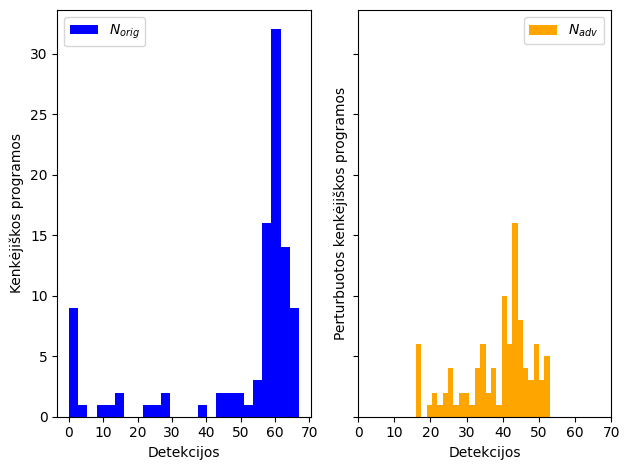

In [10]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(df_clean_1["N_orig"], bins=25, label="$N_{orig}$", color="blue")
axs[1].hist(df_clean_1["N_adv"], bins=25, label="$N_{adv}$", color="orange")
axs[0].set_ylabel("Kenkėjiškos programos")
axs[1].set_ylabel("Perturbuotos kenkėjiškos programos")
axs[0].set_xlabel("Detekcijos")
axs[1].set_xlabel("Detekcijos")
axs[0].set_xticks(range(0, 71, 10))
axs[1].set_xticks(range(0, 71, 10))
axs[0].legend()
axs[1].legend()
# plt.suptitle("Originalių ($N_{orig}$) ir perturbuotų ($N_{adv}$) kenkėjiškų programų detekcijų pasiskirstymas")
plt.show()

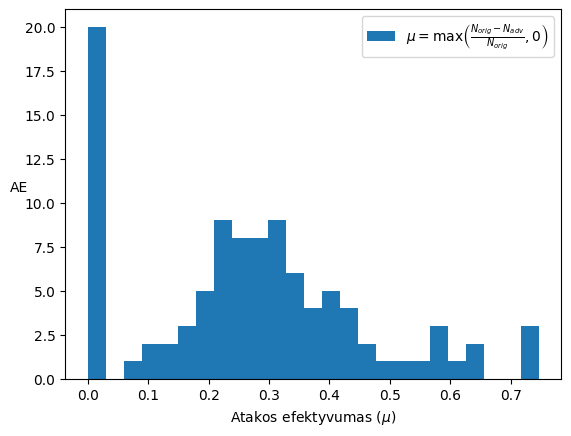

In [11]:
plt.hist(df_clean_1["evasive_rate"], bins=25, label="$\\mu = \\max{\\left(\\frac{N_{orig} - N_{adv}}{N_{orig}},0\\right)}$")
plt.legend()
# plt.title("Varžymosi principais pagrįstų atakų efektyvumo pasiskirstymas")
plt.xlabel("Atakos efektyvumas ($\\mu$)")
plt.ylabel("AE", rotation=0)
plt.show()